# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd

# Load the data into a DataFrame
# set 'Date' column as datetime as the csv is read in
df = pd.read_csv('../data/Iowa_Liquor_Sales_reduced.csv', 
                 parse_dates=['Date'], infer_datetime_format=True,
                 dtype={'Zip Code': str})

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='dark', palette='colorblind')
%matplotlib inline

In [3]:
# import the EDA functions I've built in a Python script
%run 'eda.py'

In [4]:
eda(df)

Head of the dataframe:

        Date  Store Number         City Zip Code  County Number      County  \
0 2016-03-31          5029    DAVENPORT    52806           82.0       Scott   
1 2016-03-31          5029    DAVENPORT    52806           82.0       Scott   
2 2016-03-31          4959  CEDAR FALLS    50613            7.0  Black Hawk   
3 2016-03-31          2190   DES MOINES    50314           77.0        Polk   
4 2016-03-31          5240  WEST BRANCH    52358            NaN         NaN   

    Category       Category Name  Vendor Number  Item Number  \
0  1022100.0             TEQUILA            370        87152   
1  1022100.0             TEQUILA            395        89197   
2  1071100.0  AMERICAN COCKTAILS            380        63959   
3  1031200.0      VODKA FLAVORED            205        40597   
4  1081200.0      CREAM LIQUEURS            305        73055   

                        Item Description  Bottle Volume (ml)  \
0                           Avion Silver            

In [5]:
# clean up column names so that they're dot notation friendly
clean_column_names(df, inplace=True)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.50,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.00,0.53
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.50,2.77
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.60,2.54
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.50,1.19
5,2016-03-31,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,$23.00,$34.50,1,$34.50,0.75,0.20
6,2016-03-31,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421,69636,Dr. Mcgillicuddy's Cherry Schnapps,750,$8.67,$13.01,4,$52.04,3.00,0.79
7,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,410,88294,Patron Silver Tequila,375,$14.00,$21.00,12,$252.00,4.50,1.19
8,2016-03-31,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,259,52318,Christian Bros Brandy,1750,$11.83,$17.75,6,$106.50,10.50,2.77
9,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,389,49185,Remy Martin Vsop (flask),375,$10.66,$15.99,12,$191.88,4.50,1.19


In [6]:
# change some columns to category dtype to be more memory-efficient
for column in df.loc[:, 'store_number':'item_description'].columns:
    df[column] = df[column].astype('category')

In [7]:
# remove '$' sign then cast to float
for column in ['state_bottle_cost', 'state_bottle_retail', 'sale_dollars']:
    df[column] = df[column].str.replace('$', '').astype(float)

In [8]:
# take a look at the dataframe again
eda(df, head=False, duplicated=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709552 entries, 0 to 2709551
Data columns (total 18 columns):
date                   datetime64[ns]
store_number           category
city                   category
zip_code               category
county_number          category
county                 category
category               category
category_name          category
vendor_number          category
item_number            category
item_description       category
bottle_volume_ml       int64
state_bottle_cost      float64
state_bottle_retail    float64
bottles_sold           int64
sale_dollars           float64
volume_sold_liters     float64
volume_sold_gallons    float64
dtypes: category(10), datetime64[ns](1), float64(5), int64(2)
memory usage: 207.1 MB


       bottle_volume_ml  state_bottle_cost  state_bottle_retail  bottles_sold  \
count      2.709552e+06       2.709552e+06         2.709552e+06  2.709552e+06   
mean       9.242111e+02       9.816209e+00         1.474012e+01  9.

In [9]:
# missing data
df.isnull().sum()

date                       0
store_number               0
city                       0
zip_code                   0
county_number          10913
county                 10913
category                 779
category_name           6109
vendor_number              0
item_number                0
item_description           0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

### Data Visualization

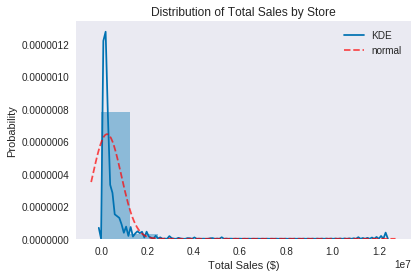

In [10]:
store_sales = df.groupby('store_number')['sale_dollars', 'bottles_sold'].sum()
distplot_with_norm_fit(store_sales.sale_dollars);
plt.xlabel('Total Sales ($)');
plt.ylabel('Probability');
plt.title('Distribution of Total Sales by Store');

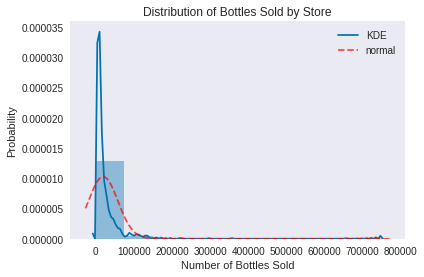

In [11]:
distplot_with_norm_fit(store_sales.bottles_sold);
plt.xlabel('Number of Bottles Sold');
plt.ylabel('Probability');
plt.title('Distribution of Bottles Sold by Store');

Some stores are obviously outliers, making a lot more sales than most of the other stores

#### add quarter and month features for further analysis

In [12]:
df['qtr'] = df.date.dt.quarter
df['month'] = df.date.dt.month

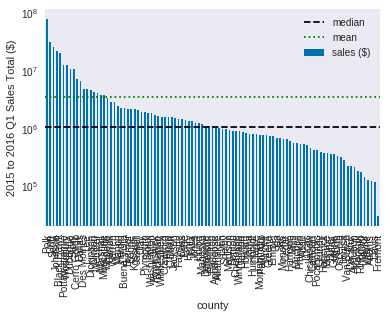

In [13]:
sales_by_county = df.groupby('county')['bottles_sold', 'volume_sold_gallons', 'sale_dollars'].sum()
sales_by_county['avg_unit_price'] = sales_by_county.sale_dollars / sales_by_county.volume_sold_gallons
sales_by_county.sale_dollars.sort_values(ascending=False).plot(kind='bar', label='sales ($)');

plt.axhline(np.median(sales_by_county.sale_dollars), linestyle='dashed', c='black', label='median');
plt.axhline(np.mean(sales_by_county.sale_dollars), linestyle='dotted', c='green', label='mean');

plt.rcParams['figure.figsize'] = 15, 10
plt.yscale('log');
plt.ylabel('2015 to 2016 Q1 Sales Total ($)');
plt.legend(loc='best');

#### separate 2015 and 2016 transactions 

In [14]:
df_2015 = df[df.date.dt.year==2015]
df_2016 = df[df.date.dt.year==2016]

#### group 2015 transactions by county and quarter

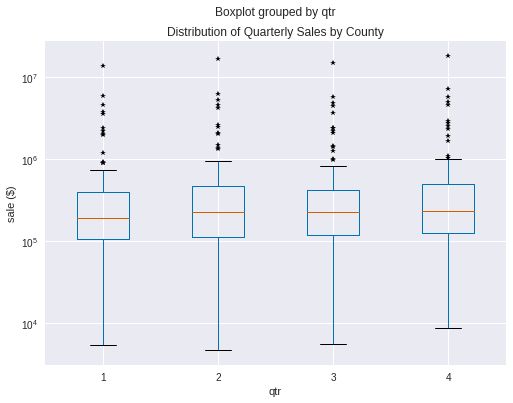

In [15]:
sales_qtr_county_2015 = df_2015.groupby(['county', 'qtr'], as_index=False)['bottles_sold',
                                                                           'volume_sold_gallons',
                                                                           'sale_dollars'].sum()

sales_qtr_county_2015['avg_unit_price'] = sales_qtr_county_2015.sale_dollars / sales_qtr_county_2015.volume_sold_gallons

plt.rcParams['figure.figsize'] = 8, 6
sales_qtr_county_2015.boxplot('sale_dollars','qtr', sym='k*');
plt.yscale('log');
plt.ylabel('sale ($)');
plt.title('Distribution of Quarterly Sales by County');

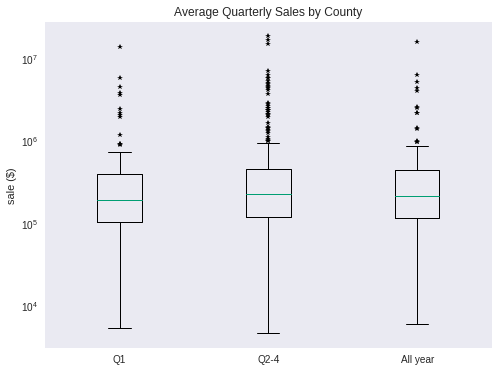

In [16]:
sales_county_2015 = df_2015.groupby('county').sale_dollars.sum()

plt.boxplot([sales_qtr_county_2015[sales_qtr_county_2015.qtr==1].sale_dollars,
             sales_qtr_county_2015[sales_qtr_county_2015.qtr!=1].sale_dollars,
             sales_county_2015/4.], 
             sym='k*', labels=['Q1', 'Q2-4', 'All year']);
plt.yscale('log');
plt.ylabel('sale ($)');
plt.title('Average Quarterly Sales by County');

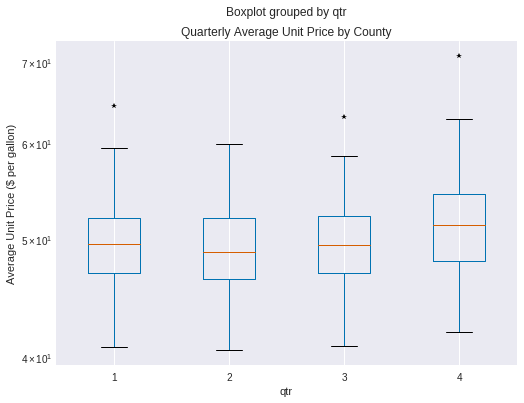

In [17]:
sales_qtr_county_2015.boxplot('avg_unit_price','qtr', sym='k*');
plt.yscale('log');
plt.ylabel('Average Unit Price ($ per gallon)');
plt.title('Quarterly Average Unit Price by County');

Comparing with sales in other quarters and the annual quarterly average, the sales in Quarter 1 do not seem to be differ very much. Although, there are consistent outlier counties. The same can be said about the average unite price.

#### Which counties are outliers?

In [18]:
sales_qtr_county_2015[sales_qtr_county_2015.avg_unit_price > 60]

,county,qtr,bottles_sold,volume_sold_gallons,sale_dollars,avg_unit_price
96,Dallas,1,52809,14098.50,9.082729e+05,64.423374
98,Dallas,3,81244,22387.02,1.413585e+06,63.143070
99,Dallas,4,101358,27186.67,1.927576e+06,70.901494
207,Johnson,4,335124,79562.73,5.003379e+06,62.885970
307,Polk,4,1326954,297269.32,1.840866e+07,61.925877
327,Scott,4,457713,94903.90,5.739680e+06,60.478862


It looks like Dallas County has a taste for expensive alcohol!

#### group 2015 transactions by county and month

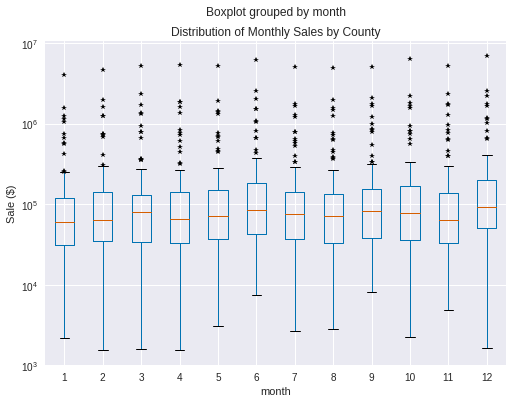

In [19]:
sales_month_county_2015 = df_2015.groupby(['county', 'month'], as_index=False)['bottles_sold',
                                                                               'volume_sold_gallons',
                                                                               'sale_dollars'].sum()

sales_month_county_2015['avg_unit_price'] = sales_month_county_2015.sale_dollars / sales_month_county_2015.volume_sold_gallons

sales_month_county_2015.boxplot('sale_dollars','month', sym='k*');
plt.yscale('log');
plt.ylabel('Sale ($)');
plt.title('Distribution of Monthly Sales by County');

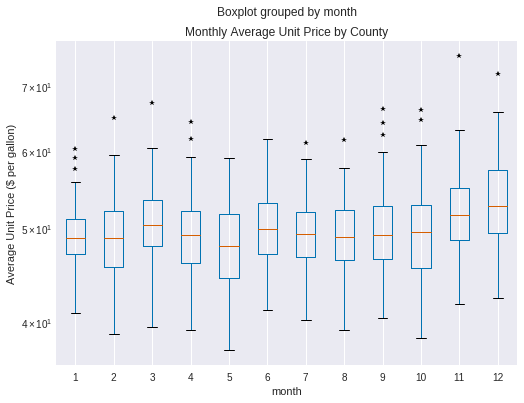

In [20]:
sales_month_county_2015.boxplot('avg_unit_price','month', sym='k*');
plt.yscale('log');
plt.ylabel('Average Unit Price ($ per gallon)');
plt.title('Monthly Average Unit Price by County');

#### Which counties are outliers?

##### outlier counties in terms of total sales

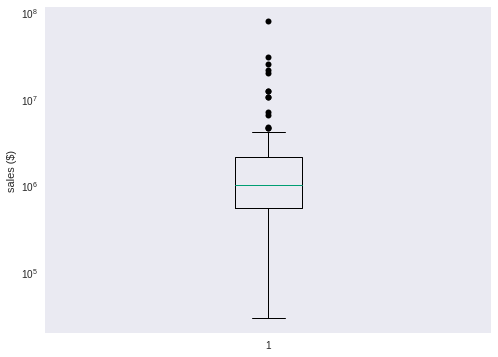

In [21]:
county_sales = df.groupby('county').sale_dollars.sum()
plt.boxplot(county_sales, sym='ko');
plt.yscale('log');
plt.ylabel('sales ($)');

In [22]:
county_sales[county_sales>county_sales.mean() + county_sales.std()].sort_values(ascending=False)

county
Polk          7.847391e+07
Linn          3.085593e+07
Scott         2.502894e+07
Johnson       2.156258e+07
Black Hawk    1.989110e+07
Name: sale_dollars, dtype: float64

##### outlier counties in terms of number of stores

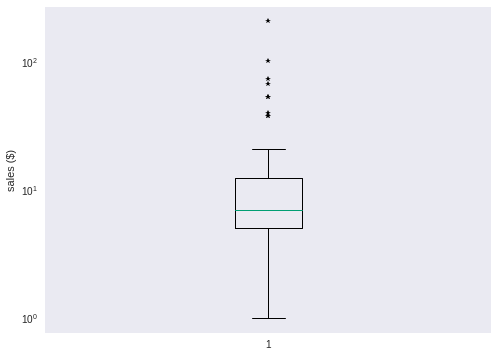

In [23]:
county_store_count = df.groupby('county').store_number.nunique()
plt.boxplot(county_store_count, sym='k*');
plt.yscale('log');
plt.ylabel('sales ($)');

In [24]:
county_store_count[county_store_count>county_store_count.mean() + county_store_count.std()].sort_values(ascending=False)

county
Polk             207
Linn             101
Black Hawk        73
Scott             67
Pottawattamie     53
Johnson           53
Dubuque           40
Name: store_number, dtype: int64

This makes a lot of sense since these are also the most populous counties in Iowa.

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


#### 2015 Q1 data by store

In [25]:
store_q1_monthly_2015 = df_2015[df_2015.qtr==1].groupby(['store_number', 'county', 'month'], as_index=False)\
                        ['bottles_sold', 'sale_dollars', 'volume_sold_gallons'].sum()
store_q1_monthly_2015['avg_unit_price'] = store_q1_monthly_2015.sale_dollars / store_q1_monthly_2015.volume_sold_gallons
store_q1_monthly_2015.drop('volume_sold_gallons', axis=1, inplace=True)
store_q1_monthly_2015.dropna(how='all',
                             subset=['bottles_sold', 'sale_dollars', 'avg_unit_price'],
                             inplace=True)

In [26]:
eda(store_q1_monthly_2015)

Head of the dataframe:

    store_number      county  month  bottles_sold  sale_dollars  \
18          2106  Black Hawk      1        7580.0     109795.48   
19          2106  Black Hawk      2        7824.0     115041.01   
20          2106  Black Hawk      3        7912.0     112330.04   
576         2113     Webster      1         571.0       7685.86   
577         2113     Webster      2         498.0       6418.05   

     avg_unit_price  
18        58.389738  
19        59.387959  
20        57.707543  
576       51.348610  
577       51.050350  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3623 entries, 18 to 416435
Data columns (total 6 columns):
store_number      3623 non-null category
county            3623 non-null category
month             3623 non-null int64
bottles_sold      3623 non-null float64
sale_dollars      3623 non-null float64
avg_unit_price    3623 non-null float64
dtypes: category(2), float64(3), int64(1)
memory usage: 206.4 KB


             month  bot

#### calculate `bottles_sold`, `sale_dollars`, and `avg_unit_price` for each month in Q1

In [27]:
store_1q_2015 = pd.DataFrame()
months = {1: 'Jan', 2: 'Feb', 3: 'Mar'}
for key, value in months.items():
    store_q1month = store_q1_monthly_2015[store_q1_monthly_2015.month==key].loc[:,['store_number', 'bottles_sold', 'sale_dollars', 'avg_unit_price']]
    store_q1month.set_index('store_number', inplace=True)
    store_q1month.columns = [value + '_' + column for column in store_q1month.columns]
    store_1q_2015 = pd.concat((store_1q_2015, store_q1month), axis=1)
store_1q_2015.dropna(inplace=True)

In [28]:
eda(store_1q_2015)

Head of the dataframe:

              Jan_bottles_sold  Jan_sale_dollars  Jan_avg_unit_price  \
store_number                                                           
2106                    7580.0         109795.48           58.389738   
2113                     571.0           7685.86           51.348610   
2130                    4831.0          71307.51           62.218072   
2152                     477.0           5746.27           44.868197   
2178                    1500.0          17970.36           46.762497   

              Feb_bottles_sold  Feb_sale_dollars  Feb_avg_unit_price  \
store_number                                                           
2106                    7824.0         115041.01           59.387959   
2113                     498.0           6418.05           51.050350   
2130                    6304.0         104825.96           67.447760   
2152                     490.0           5820.09           44.828545   
2178                    1243.0         

#### 2015 annual sales by store

In [29]:
store_2015 = df_2015.groupby(['store_number', 'county'], as_index=False).sale_dollars.sum()
store_2015.set_index('store_number', inplace=True)
store_2015.rename(columns={'sale_dollars': 'annual_sales'}, inplace=True)
store_2015.dropna(inplace=True)
eda(store_2015)

Head of the dataframe:

                   county  annual_sales
store_number                           
2106           Black Hawk    1434369.85
2113              Webster      85763.42
2130           Black Hawk    1108184.99
2152          Cerro Gordo      72080.36
2178            Allamakee     277987.96


<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 1375 entries, 2106 to 9023
Data columns (total 2 columns):
county          1375 non-null category
annual_sales    1375 non-null float64
dtypes: category(1), float64(1)
memory usage: 69.0 KB


       annual_sales
count  1.375000e+03
mean   2.067171e+05
std    5.031465e+05
min    6.799800e+02
25%    3.083995e+04
50%    7.123937e+04
75%    1.917832e+05
max    9.839393e+06


       county
count    1375
unique     99
top      Polk
freq      206


Number of duplicated rows: 0


#### create DataFrame for modeling, combining Q1 and annual data

In [30]:
model_df = store_1q_2015.merge(store_2015, left_index=True, right_index=True)

In [31]:
eda(model_df)

Head of the dataframe:

              Jan_bottles_sold  Jan_sale_dollars  Jan_avg_unit_price  \
store_number                                                           
2106                    7580.0         109795.48           58.389738   
2113                     571.0           7685.86           51.348610   
2130                    4831.0          71307.51           62.218072   
2152                     477.0           5746.27           44.868197   
2178                    1500.0          17970.36           46.762497   

              Feb_bottles_sold  Feb_sale_dollars  Feb_avg_unit_price  \
store_number                                                           
2106                    7824.0         115041.01           59.387959   
2113                     498.0           6418.05           51.050350   
2130                    6304.0         104825.96           67.447760   
2152                     490.0           5820.09           44.828545   
2178                    1243.0         

#### create dummy variables for `county`, which will be used as a predictor

In [32]:
county_dummies = pd.get_dummies(model_df.county)[1:]

In [33]:
model_df = pd.concat((model_df, county_dummies), axis=1)

In [34]:
model_df.dropna(inplace=True)

#### separate predictors and outcome

In [35]:
X = model_df.drop(['county', 'annual_sales'], axis=1)

In [36]:
y = model_df.annual_sales

In [37]:
eda(X)

Head of the dataframe:

              Jan_bottles_sold  Jan_sale_dollars  Jan_avg_unit_price  \
store_number                                                           
2113                     571.0           7685.86           51.348610   
2130                    4831.0          71307.51           62.218072   
2152                     477.0           5746.27           44.868197   
2178                    1500.0          17970.36           46.762497   
2190                    6884.0          81494.58           69.787694   

              Feb_bottles_sold  Feb_sale_dollars  Feb_avg_unit_price  \
store_number                                                           
2113                     498.0           6418.05           51.050350   
2130                    6304.0         104825.96           67.447760   
2152                     490.0           5820.09           44.828545   
2178                    1243.0          16602.12           46.109315   
2190                    6672.0         

In [38]:
y.head()

store_number
2113      85763.42
2130    1108184.99
2152      72080.36
2178     277987.96
2190    1228571.74
Name: annual_sales, dtype: float64

In [39]:
y.shape

(1116,)

In [40]:
y.describe()

count    1.116000e+03
mean     2.406006e+05
std      5.461202e+05
min      6.303740e+03
25%      4.408732e+04
50%      8.950567e+04
75%      2.226243e+05
max      9.839393e+06
Name: annual_sales, dtype: float64

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

correlation matrix (Jan-Mar x 3)

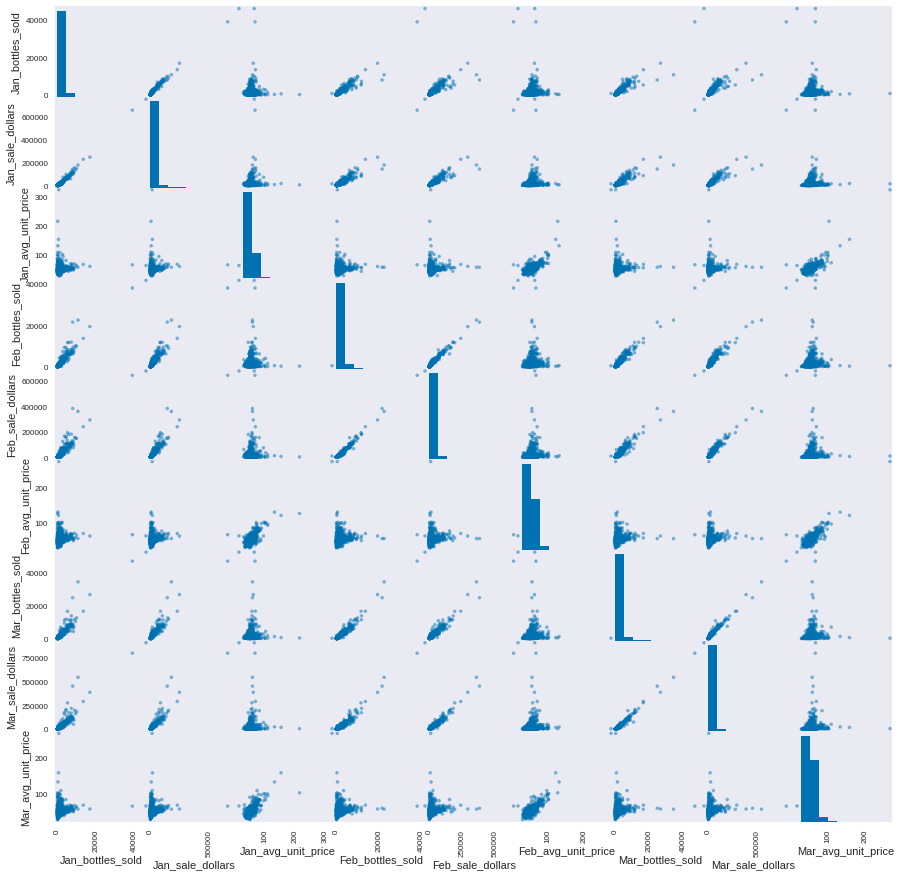

In [41]:
# make the figure bigger
plt.rcParams['figure.figsize'] = 15, 15
pd.plotting.scatter_matrix(store_1q_2015);

# reset figure size
plt.rcParams['figure.figsize'] = 6, 4

Pearson correlation coefficient: 0.102154364459; p-value: 7.14624773471e-10


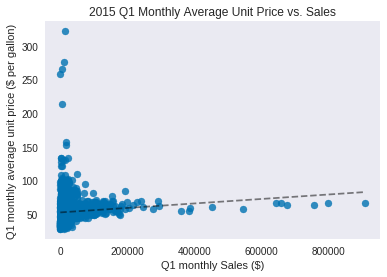

In [42]:
plt.xlabel('Q1 monthly Sales ($)')
plt.ylabel('Q1 monthly average unit price ($ per gallon)')
plt.title('2015 Q1 Monthly Average Unit Price vs. Sales');
r, p = scatter_plot_with_linear_fit(store_q1_monthly_2015.sale_dollars, store_q1_monthly_2015.avg_unit_price)
print("Pearson correlation coefficient: {}; p-value: {}".format(r, p))

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [43]:
from sklearn.model_selection import (train_test_split, 
                                     cross_val_predict,
                                     cross_val_score)

from sklearn.linear_model import (LinearRegression,
                                 Ridge, RidgeCV,
                                 Lasso, LassoCV)

from sklearn.metrics import (r2_score, mean_squared_error)

#### TTS

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=92)

#### Linear Rigression

In [45]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_linreg)))

8710629220.49


#### RidgeCV

In [46]:
alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [47]:
ridgeregcv.coef_

array([  5.74727046e+00,   5.86200360e+00,  -3.47612557e+02,
        -1.17296831e+01,   4.30069427e+00,  -2.89117853e+02,
         2.17729165e+00,   3.66216165e+00,   9.02591499e+02,
        -1.22699758e+04,   1.45174062e+04,   2.38928105e+04,
         2.22495368e+04,   1.34394406e+04,  -5.18135076e+04,
         4.54344820e+03,   1.42168069e+04,  -1.57866964e+04,
        -8.11830029e+03,   3.54290999e+03,  -4.01976037e+03,
        -1.09847736e+04,   1.71820784e+04,   1.03735497e+04,
         6.30581288e+03,   1.67130286e+04,  -2.97469530e+04,
        -2.06202128e+03,   8.96339025e+03,  -1.75944996e+04,
        -2.41880774e+03,   7.03629787e+03,  -2.47681522e+04,
         1.37014657e+05,   6.14216151e+03,  -6.90525189e+03,
        -3.93498156e+03,  -7.63605945e+03,   3.84785935e+04,
         5.25209416e+03,   2.27444438e+04,  -2.82768684e+03,
        -8.18148562e+04,   1.78613324e+03,   3.18362744e+03,
        -1.49534632e+04,  -7.08323815e+03,   5.25206864e+03,
        -1.18594679e+03,

In [48]:
y_pred_ridge = ridgeregcv.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

92158.7747571


#### LassoCV

In [49]:
lassoregcv = LassoCV(n_alphas=100, normalize=True)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

195.1812130393551

In [50]:
lassoregcv.coef_

array([  0.00000000e+00,   6.13121610e+00,   0.00000000e+00,
         0.00000000e+00,   3.58697707e+00,   0.00000000e+00,
         0.00000000e+00,   3.74979854e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         9.35089773e+04,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,

In [51]:
y_pred_lasso = lassoregcv.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

85948.5648457


The RMSE given by the Ridge and Lasso models are pretty close. The performance of the Linear Regression Model is inferior.

#### Onto 2016 Q1 data

In [52]:
q1_2015 = df_2015[df_2015.qtr==1].sale_dollars.sum()

In [53]:
q1_2016 = df_2016[df_2016.qtr==1].sale_dollars.sum()

In [54]:
(q1_2016 - q1_2015) / q1_2015

0.040344597180209094

In [55]:
# similar to processing the 2015 Q1 data
store_q1_monthly_2016 = df_2016[df_2016.qtr == 1].groupby(['store_number', 'county', 'month'], as_index=False)\
                        ['bottles_sold', 'sale_dollars', 'volume_sold_gallons'].sum()
store_q1_monthly_2016['avg_unit_price'] = store_q1_monthly_2016.sale_dollars / store_q1_monthly_2016.volume_sold_gallons
store_q1_monthly_2016.drop('volume_sold_gallons', axis=1, inplace=True)
store_q1_monthly_2016.dropna(how='all',
                             subset=['bottles_sold', 'sale_dollars', 'avg_unit_price'],
                             inplace=True)

store_1q_2016=pd.DataFrame()
months = {1: 'Jan', 2: 'Feb', 3: 'Mar'}
for key, value in months.items():
    store_q1month = store_q1_monthly_2016[store_q1_monthly_2016.month == key].loc[:, ['store_number', 
                                                                                      'bottles_sold', 
                                                                                      'sale_dollars', 
                                                                                      'avg_unit_price']]
    store_q1month.set_index('store_number', inplace=True)
    store_q1month.columns = [value + '_' + column for column in store_q1month.columns]
    store_1q_2016 = pd.concat((store_1q_2016, store_q1month), axis=1)

# create a store to county index (for creating dummy variables)
store_to_county = store_q1_monthly_2016.groupby('county').store_number.value_counts()
store_to_county = store_to_county.reset_index(level=['county'], name='store_counts')

county_dummies = pd.get_dummies(store_to_county.county)[1:]

predictors = pd.concat((store_1q_2016, county_dummies), axis=1)
predictors.dropna(inplace=True)

In [56]:
predicitons_2016_ridgeregcv = ridgeregcv.predict(predictors)
projected_total_sales_ridgeregcv = predicitons_2016_ridgeregcv.sum()
print('Projected 2016 annual sales by Ridge Regularization Model: ${}'.format(int(projected_total_sales_ridgeregcv)))

Projected 2016 annual sales by Ridge Regularization Model: $279562253


In [57]:
predictions_lassoregcv_2016 = lassoregcv.predict(predictors)
projected_total_sales_lassoregcv = predictions_lassoregcv_2016.sum()
print('Projected 2016 annual sales by Lasso Regularization Model: ${}'.format(int(projected_total_sales_lassoregcv)))

Projected 2016 annual sales by Lasso Regularization Model: $280373587


In [58]:
actual_sales_total_2015 = df_2015.sale_dollars.sum()
print('2015 annual sales: ${}'.format(int(actual_sales_total_2015)))

2015 annual sales: $284328572


In [59]:
def change_percentage(projected, actual):
    return (projected - actual) / actual

for projected in [projected_total_sales_ridgeregcv, projected_total_sales_lassoregcv]:
    print(change_percentage(projected, actual_sales_total_2015))

-0.0167634166474
-0.0139099089839


#### Both the Ridge and Lasso models project a decrease in sales in 2016, 1.68% and 1.39%, respectively.

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

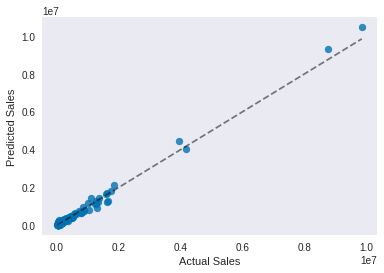

In [60]:
scatter_plot_with_linear_fit(y_test, y_pred_lasso, slope=1, y_intercept=0);
plt.xlabel('Actual Sales');
plt.ylabel('Predicted Sales');

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

### Executive Summary
  
#### Subject matter
This report provides an analysis of the current liquor sales from Iowa State to stores that have a class E liquor license, and the projection of sales for the rest of the year.  
  
#### Mehtods of Analysis
Methods of analysis include aggregating transactions by store and by month, modeling with Lasso regularized linear regression, using county, sales, bottles sold, and average unit price from the first quarter of the year as predictors to predict annual sales, evaluating model performance with cross-validation and train/test split techniques.
  
#### Findings
Sales vary greatly among counties. Sales in the first quarter of 2016 has increased 4.03% compared with the same period in 2015. The projected 2016 sales have a decrease of 1.39% compared with 2015 sales.   
  
#### Recommendations
- Tax revenue from alcohol sales is projected to decrease if tax rates remains unchanged; however, increasing tax rate is likely to further discourage liquor sales. 
- While reducing price mark-up rate will lower sales margins, it may encourage more sales.
- Issue more liquor licenses to encourage liquor sales.  
How these factors would affect liquor sales and revenue needs further investigation.
  
#### Limitations of the Report
About 0.40% of the transactions do not have the county information available (about 0.35% of total sales). Since county is used as a predictor in the model, the missing data may limit the accuracy of the model, during both the model fitting and prediction phases.